<a href="https://colab.research.google.com/github/BhavishBerry/CNN-Project/blob/main/ComputerVisiontensorFlow(CONV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Binary-Class Classification Model**

Lets create a binaryclass classification model to predict if a given image is of pizza or steak.

We need to implement Convolutional Neural Networks because regular neural network may not be able to learn and predict properly from the given data,as the given data is in RGB and deep-learning can really help us out

## Importing Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-06-01 14:17:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.9MB/s    in 6.1s    

2025-06-01 14:17:27 (17.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Becoming one with the data

In [3]:
#inspect the data
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img


['3039549.jpg']
Image shape: (384, 512, 3)


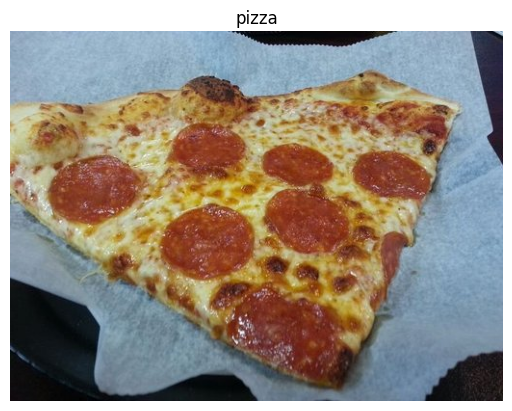

In [6]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [7]:
!pip install tensorflow
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[139, 160, 187],
        [139, 160, 187],
        [141, 162, 189],
        ...,
        [148, 170, 191],
        [129, 154, 176],
        [163, 188, 210]],

       [[146, 167, 194],
        [142, 163, 190],
        [139, 160, 187],
        ...,
        [183, 206, 224],
        [173, 195, 216],
        [161, 186, 206]],

       [[151, 173, 197],
        [145, 167, 191],
        [139, 161, 185],
        ...,
        [158, 177, 194],
        [160, 181, 200],
        [187, 210, 228]],

       ...,

       [[ 16,  10,  14],
        [ 16,  10,  14],
        [ 16,  10,  14],
        ...,
        [ 29,  25,  24],
        [ 33,  29,  28],
        [ 42,  38,  37]],

       [[ 17,  11,  15],
        [ 17,  11,  15],
        [ 17,  11,  15],
        ...,
        [ 26,  22,  21],
        [ 26,  22,  21],
        [ 44,  40,  39]],

       [[ 17,  11,  15],
        [ 17,  11,  15],
        [ 17,  11,  15],
        ...,
        [ 28,  24,  2

In [8]:
img/255

array([[[0.54509804, 0.62745098, 0.73333333],
        [0.54509804, 0.62745098, 0.73333333],
        [0.55294118, 0.63529412, 0.74117647],
        ...,
        [0.58039216, 0.66666667, 0.74901961],
        [0.50588235, 0.60392157, 0.69019608],
        [0.63921569, 0.7372549 , 0.82352941]],

       [[0.57254902, 0.65490196, 0.76078431],
        [0.55686275, 0.63921569, 0.74509804],
        [0.54509804, 0.62745098, 0.73333333],
        ...,
        [0.71764706, 0.80784314, 0.87843137],
        [0.67843137, 0.76470588, 0.84705882],
        [0.63137255, 0.72941176, 0.80784314]],

       [[0.59215686, 0.67843137, 0.77254902],
        [0.56862745, 0.65490196, 0.74901961],
        [0.54509804, 0.63137255, 0.7254902 ],
        ...,
        [0.61960784, 0.69411765, 0.76078431],
        [0.62745098, 0.70980392, 0.78431373],
        [0.73333333, 0.82352941, 0.89411765]],

       ...,

       [[0.0627451 , 0.03921569, 0.05490196],
        [0.0627451 , 0.03921569, 0.05490196],
        [0.0627451 , 0

##**Preprocessing images as to make our model predict better, as well as creating our first model.**

Models tend to predict better on normalised (i.e. data transformed between 0 and 1) or standardised data(Z-score)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set random seed
tf.random.set_seed(42)

#Preprocess data(get all the pixel values between 0 to 1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directives
train_dir ="pizza_steak/train"
test_dir ="pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
#build a cnn model (same as the tiny vgg on the cnn explainer website)

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#Compile the model

model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit the model

history1 = model1.fit(train_data,
                      epochs=20,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - accuracy: 0.6307 - loss: 0.6335 - val_accuracy: 0.7980 - val_loss: 0.4592
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7844 - loss: 0.4576 - val_accuracy: 0.8360 - val_loss: 0.3685
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.8038 - loss: 0.4400 - val_accuracy: 0.8640 - val_loss: 0.3652
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.8275 - loss: 0.3842 - val_accuracy: 0.8840 - val_loss: 0.3217
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8682 - loss: 0.3113 - val_accuracy: 0.8400 - val_loss: 0.4102
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8732 - loss: 0.3300 - val_accuracy: 0.8460 - val_loss: 0.3332
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9055 - loss: 0.2714 - val_accuracy: 0.8640 - val_loss: 0.3116
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9286 - loss: 0.1815 - val_accuracy: 0.864

##Creating a helper function that plots 2 different graphs one of both losses and one of both accuracies to check our models performance

In [10]:
# lets create a function to plot 2 different graphs one of both losses and one of both accuracies to check our models performance
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training & validation loss and accuracy curves from a Keras model's history.

    Parameters:
    - history: A `History` object returned by model.fit() in Keras.
    """
    # Extract metrics
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')
    acc = history.history.get('accuracy')
    val_acc = history.history.get('val_accuracy')

    epochs = range(1, len(loss) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


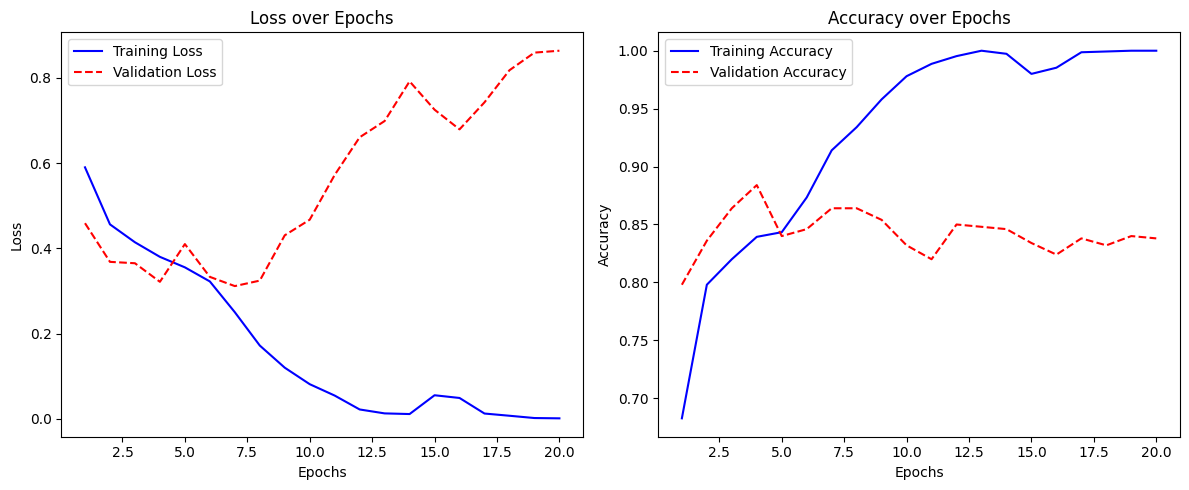

In [11]:
plot_training_history(history1)

### As we can observe in graph the model clearly is overfitting.
i.e. Learning the parameters too well from only training sets and loosing the ability to generalise and make predictions on test sets.

## We can use Data-Augmentation to reduce overfitting of our model

In [12]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)
# we can use data augmentation to further imporve our model
#import data and augment it from training directory
print("Augmenting training data")
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      batch_size=32,
                                                                      target_size=(224,224),
                                                                      class_mode="binary",
                                                                      seed=42,
                                                                      shuffle=False)


#create non-augmented train data bathces
print("Creating non-augmented train data batches")
train_data_non_augmented = train_datagen.flow_from_directory(train_dir,
                                                              batch_size=32,
                                                              target_size=(224,224),
                                                              class_mode="binary",
                                                              seed=42,
                                                              shuffle=False)



IMG_SIZE = (224,224)

#create non-augmented test data batches
print("Creating non-augmented test data batches")
test_data = test_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=IMG_SIZE,
                                              class_mode="binary",
                                              seed=42,
                                              shuffle=False)



Augmenting training data
Found 1500 images belonging to 2 classes.
Creating non-augmented train data batches
Found 1500 images belonging to 2 classes.
Creating non-augmented test data batches
Found 500 images belonging to 2 classes.


### Becoming One with the augmented data

In [13]:
# get sample data batches
images, labels = next(train_data_non_augmented)
augmented_images, augmented_labels = next(train_datagen_augmented)

19
Original image shape: (224, 224, 3)
Augmented image shape: (224, 224, 3)


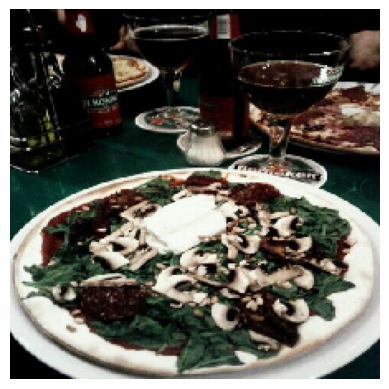

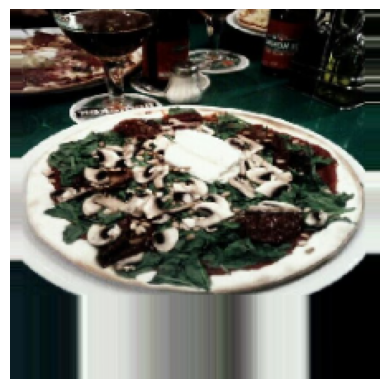

In [14]:
#show original image and augmented image
import random
import matplotlib.pyplot as plt
random_number = random.randint(0,31)
print(random_number)
print(f"Original image shape: {images[random_number].shape}")
print(f"Augmented image shape: {augmented_images[random_number].shape}")
plt.imshow(images[random_number])
plt.axis("off")
plt.show()
plt.imshow(augmented_images[random_number])
plt.axis("off")
plt.show()

##Creating our second model with the augmented data

In [15]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model2 = Sequential([
    Conv2D(input_shape=(224,224,3),
           filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2,padding="valid"),

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),

    Flatten(),
    Dense(1,activation="sigmoid")])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history2 = model2.fit(train_datagen_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_datagen_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 405ms/step - accuracy: 0.4000 - loss: 0.7224 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 392ms/step - accuracy: 0.4691 - loss: 0.6928 - val_accuracy: 0.6020 - val_loss: 0.6596
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 394ms/step - accuracy: 0.5662 - loss: 0.6668 - val_accuracy: 0.6760 - val_loss: 0.5444
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.6160 - loss: 0.6442 - val_accuracy: 0.7860 - val_loss: 0.5223
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.7234 - loss: 0.5626 - val_accuracy: 0.7620 - val_loss: 0.4967


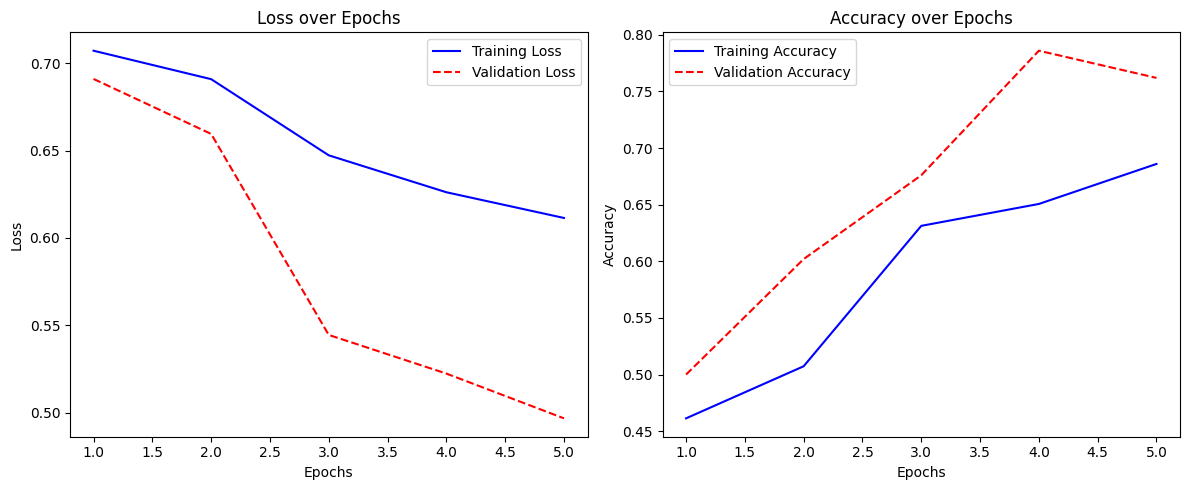

In [16]:
plot_training_history(history2)

### As we can observe in the graph the validation accuracy is decreased even more as compared to our previoused model this is due to non-shuffled data

### lets try shuffling our data

In [17]:
# lets try shuffling our data
train_datagen_augmented_shuffled_generator = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)
# we can use data augmentation to further imporve our model
#import data and augment it from training directory
print("Augmenting training data")
# Call flow_from_directory on the ImageDataGenerator instance
train_datagen_augmented_shuffled = train_datagen_augmented_shuffled_generator.flow_from_directory(train_dir,
                                                                      batch_size=32,
                                                                      target_size=(224,224),
                                                                      class_mode="binary",
                                                                      seed=42,
                                                                      shuffle=True)


#create non-augmented train data bathces
print("Creating non-augmented train data batches")
train_data_non_augmented_shuffled = train_datagen.flow_from_directory(train_dir,
                                                              batch_size=32,
                                                              target_size=(224,224),
                                                              class_mode="binary",
                                                              seed=42,
                                                              shuffle=True)


IMG_SIZE = (224,224)

#create non-augmented test data batches
print("Creating non-augmented test data batches")
test_data_shuffled = test_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=IMG_SIZE,
                                              class_mode="binary",
                                              seed=42,
                                              shuffle=False)

Augmenting training data
Found 1500 images belonging to 2 classes.
Creating non-augmented train data batches
Found 1500 images belonging to 2 classes.
Creating non-augmented test data batches
Found 500 images belonging to 2 classes.


###Lets try  building model3 with same parmeters this time with shuffled data

In [18]:
#lets try  building model3 with same parameters this time with shuffled data

model3 = Sequential([
    Conv2D(input_shape=(224,224,3),
           filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2,padding="valid"),

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),

    Flatten(),
    Dense(1,activation="sigmoid")])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history3 = model3.fit(train_datagen_augmented_shuffled,
                      epochs=20,
                      steps_per_epoch=len(train_datagen_augmented_shuffled),
                      validation_data=test_data_shuffled,
                      validation_steps=len(test_data_shuffled))


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 405ms/step - accuracy: 0.5754 - loss: 0.6646 - val_accuracy: 0.7320 - val_loss: 0.5192
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 390ms/step - accuracy: 0.7326 - loss: 0.5480 - val_accuracy: 0.8440 - val_loss: 0.3657
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.7682 - loss: 0.4823 - val_accuracy: 0.8200 - val_loss: 0.4072
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.7807 - loss: 0.4892 - val_accuracy: 0.8760 - val_loss: 0.3341
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 393ms/step - accuracy: 0.8134 - loss: 0.4461 - val_accuracy: 0.8100 - val_loss: 0.4212
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.7735 - loss: 0.4717 - val_accuracy: 0.8800 - val_loss: 0.3175
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.7997 - loss: 0.4440 - val_accuracy: 0.8660 - val_loss: 0.3010
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 386ms/step - accuracy: 0.8162 - loss: 0.4154 - val_accu

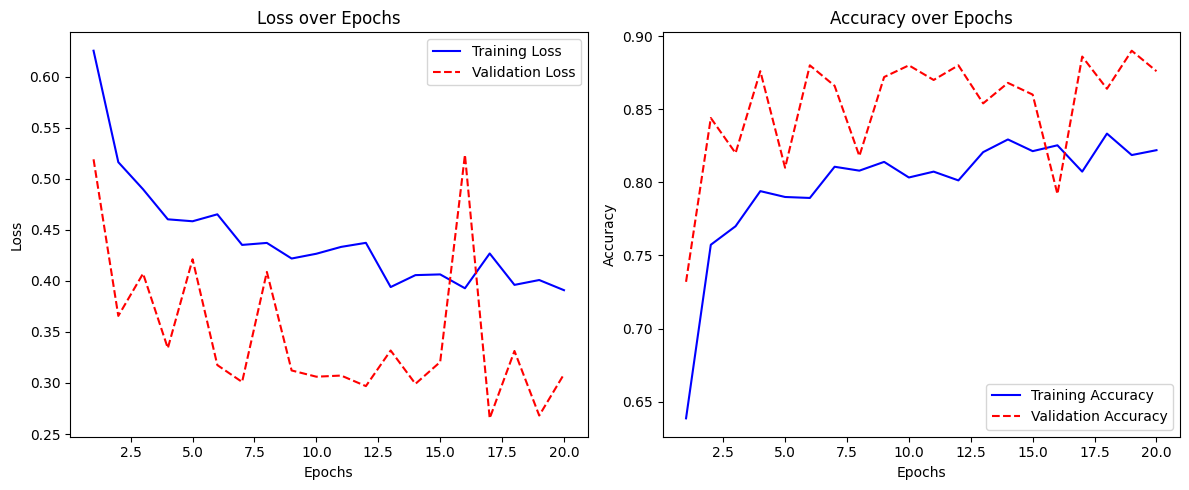

In [19]:
plot_training_history(history3)

#### As we can observe our validation accuracy observed quite a bit and we can repeat these steps until satisfied and many others to improve this **Binary Classification model.**

#**Multiclass image classification**

Lets convert or modify this model so that it can predict on multiclass images now that it works ***fairly well*** on binary class classification

##**Steps to Make a multiclass classification model:**

1. Identify and become one with the data
2. Preprocess the data(Get it ready for a model):
  1. Normalization of data
  2. Data augmentation

3. Create a model(Start with a baseline)
4. Fit the model(we can start with overfitting to make sure it works)
5. Evaluate a model(Reduce the overfitting and confirguring the model for proper results)
6. Repeat Until Satisfied




 ## 1. Import and become on with the data

In [20]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2025-06-01 14:27:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 64.233.170.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.8MB/s    in 24s     

2025-06-01 14:27:35 (20.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [21]:
import os

# Walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [22]:
# Setup the train and test directories

train_dir_multi = "10_food_classes_all_data/train/"
test_dir_multi = "10_food_classes_all_data/test/"

In [23]:
# lets get class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir_multi)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

['1234835.jpg']
Image shape: (512, 512, 3)


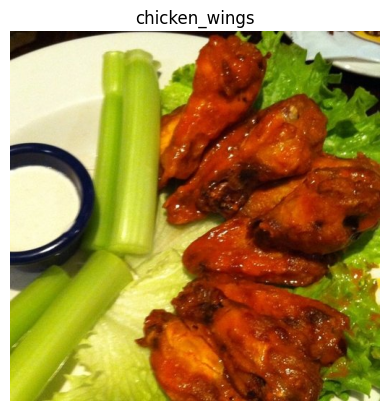

In [35]:
# visualise our data set

import random

img = view_random_image(target_dir=train_dir_multi, target_class=random.choice(class_names))

## 2. Preprocess the data (Prepare it for a model)

1. Start by rescaling pixel values of imaes that are between 0 to 255 and convert them into normalised data(i.e. between 0 and 1)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale our data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


2. Load all the images from the directory by using **train_datagen.** functions which first retrieves the images one by one in batches of 32 and  processes the data into normalization.

In [26]:
# Load data in from directories and turn it into batches
train_data_multi = train_datagen.flow_from_directory(train_dir_multi,
                                                      batch_size=32,
                                                      class_mode="categorical",
                                                      target_size=(224,224))

test_data_multi = test_datagen.flow_from_directory(test_dir_multi,
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    target_size=(224,224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model start with a baseline


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import tensorflow as tf
tf.random.set_seed(42)

model4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10,activation="softmax")
])

model4.compile(loss=tf.keras.losses.CategoricalCrossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history4 = model4.fit(train_data_multi,
                      epochs=20,
                      steps_per_epoch=len(train_data_multi),
                      validation_data=test_data_multi
               )

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 109ms/step - accuracy: 0.1300 - loss: 2.3416 - val_accuracy: 0.2456 - val_loss: 2.0649
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.3157 - loss: 1.9746 - val_accuracy: 0.3120 - val_loss: 1.9370
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.4580 - loss: 1.6175 - val_accuracy: 0.3256 - val_loss: 1.9522
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.6681 - loss: 1.0436 - val_accuracy: 0.3092 - val_loss: 2.3382
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.8699 - loss: 0.4438 - val_accuracy: 0.2576 - val_loss: 3.3921
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9606 - loss: 0.1572 - val_accuracy: 0.2492 - val_loss: 4.7672
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9858 - loss: 0.0657 - val_accuracy: 0.2552 - val_loss: 5.8346
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.9910 - loss: 0.0423 -

## 4. Evaluate the model

In [28]:
# Evaluate our model on the test data
model4.evaluate(test_data_multi)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.2225 - loss: 10.1759


[10.094069480895996, 0.23280000686645508]

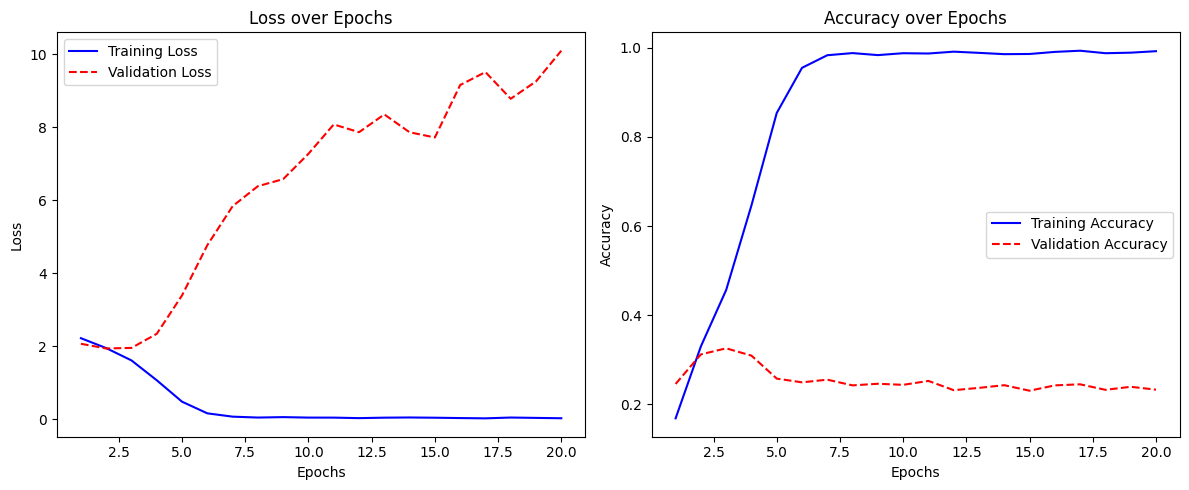

In [29]:
# check our data's loss curves
plot_training_history(history4)

Our model seems to be overfitting, by looking at loss and accuracy curves it is quite clear.

## Reduce overfitting of the model



### Regularization Techniques to Prevent Overfitting in CNNs

---

## ✅ 1. **Dropout**

Randomly drops some neurons to force generalization.

```python
from tensorflow.keras.layers import Dropout
Dropout(0.3)
```

---

## ✅ 2. **Data Augmentation**

Artificially creates more diverse training images (flipping, rotating, etc.), so the model doesn’t memorize specific patterns.

### 📦 Use this inside your training generator:

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
```

This is **very effective** and usually used along with dropout.

---

## ✅ 3. **Early Stopping**

Stops training when the model **starts to overfit**, based on validation loss.

```python
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,  # stop if no improvement for 3 epochs
                               restore_best_weights=True)
```

Use it during training:

```python
history = model.fit(train_data_multi,
                    validation_data=test_data_multi,
                    epochs=20,
                    callbacks=[early_stopping])
```

---

## ✅ 4. **Simplify the Model**

If your model is too complex (too many layers or filters), reduce its capacity.

For example, instead of:

```python
Conv2D(64, 3, ...)
```

Use:

```python
Conv2D(16, 3, ...)
```

Fewer filters = less memorization capacity.

---

## ✅ 5. **L2 Regularization (Weight Decay)**

Penalizes large weights to keep the model simpler and more general.

### Example:

```python
from tensorflow.keras.regularizers import l2

Conv2D(10, 3, activation="relu", kernel_regularizer=l2(0.01))
```

You can add this to any layer (Conv2D or Dense).

---

## ✅ 6. **Batch Normalization** (Advanced)

Stabilizes and speeds up training by normalizing activations between layers — sometimes helps with generalization.

### Example:

```python
from tensorflow.keras.layers import BatchNormalization

Conv2D(10, 3, activation="relu"),
BatchNormalization()
```

---

## 🔁 Combine Techniques for Best Results

A **great combo** for your case is:

- ✅ Data Augmentation
- ✅ Dropout
- ✅ Early Stopping


#### **Trial-1: Another One of the simpler ways to reduce overfitting is by removing some of the layers from the model**

In [36]:
#lets try to remove 2 conv2d layers from our model

# Creating a model
model5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10,activation="softmax")
])


model5.compile(loss=tf.keras.losses.CategoricalCrossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history5 = model5.fit(train_data_multi,
                      epochs=5,
                      steps_per_epoch=len(train_data_multi),
                      validation_data=test_data_multi,
                      validation_steps=len(test_data_multi)
               )

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.1483 - loss: 2.3672 - val_accuracy: 0.2812 - val_loss: 2.0167
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.3984 - loss: 1.7508 - val_accuracy: 0.2988 - val_loss: 2.0468
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.6415 - loss: 1.1581 - val_accuracy: 0.3072 - val_loss: 2.1382
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.8289 - loss: 0.6191 - val_accuracy: 0.2876 - val_loss: 2.6943
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9347 - loss: 0.2708 - val_accuracy: 0.2796 - val_loss: 3.2579


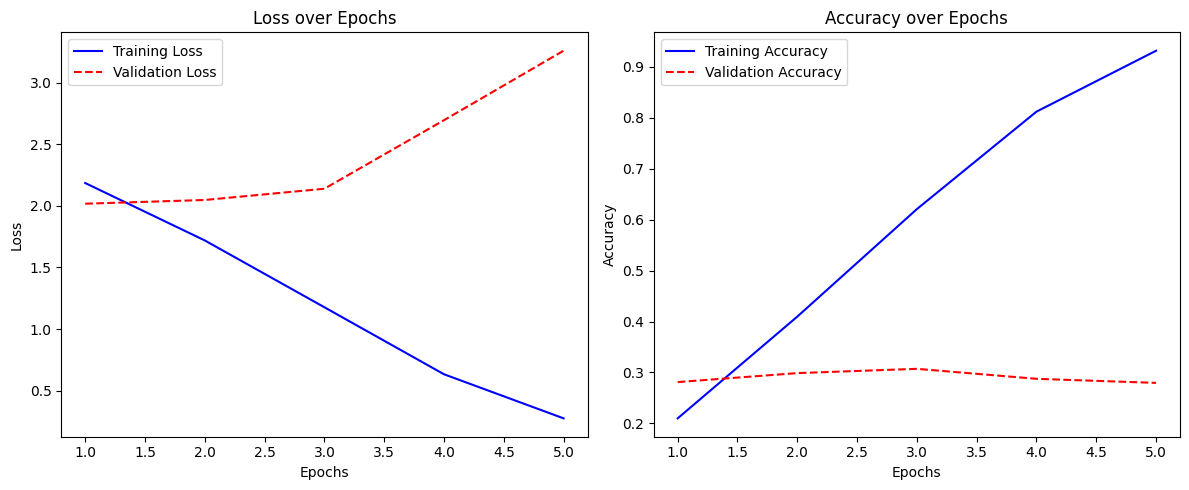

In [37]:
# lets Check the loss curves
plot_training_history(history5)

#####By looking at the loss and accuracy curves, it is clear that this method does not work and model still overfits

#### **Trial-2: Lets try Data Augmentation**

##### **Augmenting the data for multi-class directory**

In [40]:
# lets try shuffling our data
train_datagen_augmented_Multi_shuffled_generator = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True)

test_datagen_Multi = ImageDataGenerator(rescale=1/255.)

# we can use data augmentation to further imporve our model
#import data and augment it from training directory
print("Augmenting training data")
# Call flow_from_directory on the ImageDataGenerator instance
train_datagen_augmented_Multi_shuffled = train_datagen_augmented_Multi_shuffled_generator.flow_from_directory(train_dir_multi,
                                                                      batch_size=32,
                                                                      target_size=(224,224),
                                                                      # Change class_mode to "categorical" for multiclass
                                                                      class_mode="categorical",
                                                                      seed=42,
                                                                      shuffle=True)


#create non-augmented train data bathces
print("Creating non-augmented train data batches")

train_data_non_augmented_Multi_shuffled = train_datagen.flow_from_directory(train_dir_multi,
                                                              batch_size=32,
                                                              target_size=(224,224),
                                                              # Change class_mode to "categorical" for multiclass
                                                              class_mode="categorical",
                                                              seed=42,
                                                              shuffle=True)


IMG_SIZE = (224,224)

#create non-augmented test data batches
print("Creating non-augmented test data batches")
test_data_Multi = test_datagen_Multi.flow_from_directory(test_dir_multi, # Use test_datagen_Multi
                                              batch_size=32,
                                              target_size=IMG_SIZE,
                                              # Change class_mode to "categorical" for multiclass
                                              class_mode="categorical",
                                              seed=42,
                                              shuffle=False)

Augmenting training data
Found 7500 images belonging to 10 classes.
Creating non-augmented train data batches
Found 7500 images belonging to 10 classes.
Creating non-augmented test data batches
Found 2500 images belonging to 10 classes.


##### **Lets fit the model with our new Augmented data**

In [41]:
model6 = tf.keras.models.clone_model(model4)

model6.compile(loss=tf.keras.losses.CategoricalCrossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history6 = model6.fit(train_datagen_augmented_Multi_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_datagen_augmented_Multi_shuffled),
                      validation_data=test_data_Multi,
                      validation_steps=len(test_data_Multi)
               )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 392ms/step - accuracy: 0.1464 - loss: 2.2556 - val_accuracy: 0.2008 - val_loss: 2.1726
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 92s 389ms/step - accuracy: 0.2552 - loss: 2.0847 - val_accuracy: 0.3560 - val_loss: 1.8846
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 91s 388ms/step - accuracy: 0.3012 - loss: 1.9984 - val_accuracy: 0.3772 - val_loss: 1.8041
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 91s 385ms/step - accuracy: 0.3376 - loss: 1.9221 - val_accuracy: 0.4008 - val_loss: 1.7188
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 91s 386ms/step - accuracy: 0.3440 - loss: 1.8972 - val_accuracy: 0.4292 - val_loss: 1.6929


In [42]:
model4.evaluate(test_data_Multi)
model6.evaluate(test_data_Multi)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.2329 - loss: 9.8467
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.4403 - loss: 1.6238


[1.6928631067276, 0.4291999936103821]

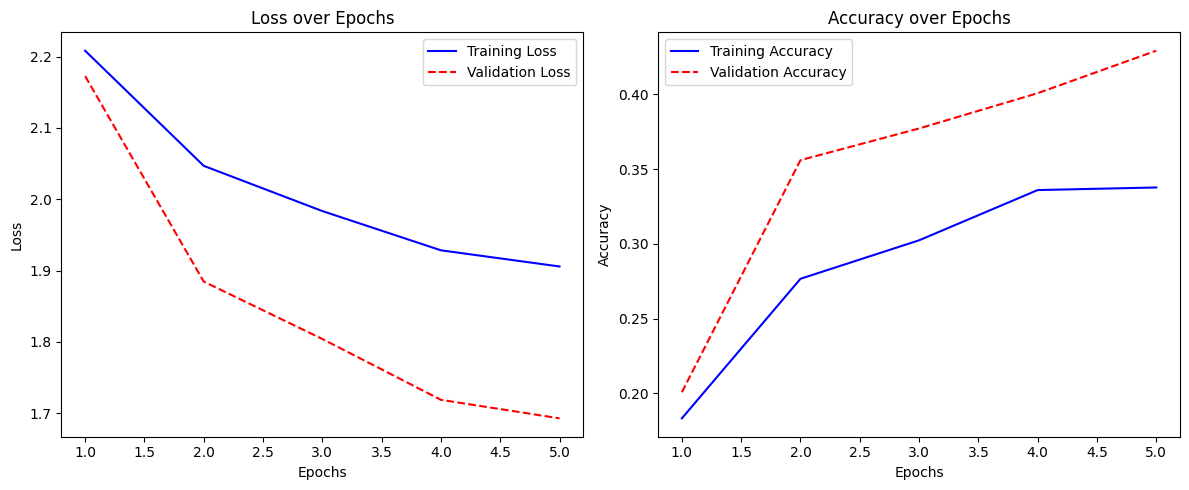

In [43]:
# lets plot the curves
plot_training_history(history6)

##### As we observe the loss and accuracy curves are falling in line and our accuracy is also increased as compared to model-4

#### **We can repeat these and several other methods like training for longer that can improve our model**